# Introduction

In the context of human resource analytics performance refers to how well an employee is meeting the standards/expectations of a company. Although this dataset doesn't explicitly have a column that describes a worker's performance there are various features that may explain what influences a worker's performance. Because of this reason we aim to use PCA in order to determine what features best describe the variance seen in the data making, resulting in a lower dimensionality when creating a model to predict a worker's performance.

 PCA performance is often evaluated based on the proportion of total variance in the dataset that is captured (explained) by the principal components. The explained variance indicates how much information (variability) each principal component holds. A few components explaining a high proportion of the total variance is desirable, as it means you can reduce dimensionality without losing much information.

 This is the cumulative sum of the explained variances of the principal components. It helps in determining the number of components to retain by showing how much total variance is explained by the first n components. The point at which the cumulative explained variance reaches a satisfactory level (e.g., 80-90%) is often chosen as the cut-off for the number of components to keep.
 

 The loadings of a principal component represent the correlation between the original variables (predictors) and the principal component. They help in understanding which variables contribute most to a component's variance. High absolute values of loadings indicate that a variable has a strong influence on the component.

 These are visual representations of the component loadings and can help in interpreting the contribution of each variable to the principal components. Variables that are close to each other in the plot are positively correlated, while those positioned on opposite sides of the plot origin are negatively correlated. Variables near the plot origin have little influence on that principal component.

# Data Analysis

1. Age: numerical feature that describes the workers age
2. Attrition: categorical feature that likely represents whether that worker has left some other job (attrition). There seems to be some anomalies with
Some older workers having experienced no attrition, which can be due to the fact that this is synthetic data
3. BusinessTravel: categorical feature that describes how often the worker travels
4. DailyRate: numerical feature that describes the amount of money the worker makes in a day
5. Department: categorical feature that describes the department the worker works in
6. DistanceFromHome: numerical feature that describes the workers distance from home, unit of measure is unspecified but normalizing the data should take care of that.
7. Education: numerical feature that describes the workers education level (ascending order considering curve)
8. EducationField: categorical feature that describes the field the worker studied.
9. EmployeeCount: numerical feature, all entries are 1 so this likely refers to how many employees each entry corresponds to
10. EmployeeNumber: numerical feature, likely an identifier considering the numbers are ascending from the ehad to the tail
11. EnvironmentSatisfaction: categorical feature that describes the worker's satisfcation with work environments
12. Gender: caegorical feature that describes the worker's sex
13. HourlyRate: numerical feature that describes how much money the worker makes an hour
14. JobInvolvement: numerical feature that describes how involved the worker is with their job (ascending order)
15. JobLevel: numerical feature that describes the worker's rank
16. JobRole: categorical feature that describes the worker's role
17. JobSatisfaction: numerical feature that describes the level of satisfaction the worker has with their job (ascending order)
18. MaritalStatus: categorical feature that describes whether the worker is married
19. MonthlyIncome: numerical feature that describes how much money the worker makes in month
20. MonthlyRate: numerical feature that describes how much money the worker makes in a month solely from salary/pay
21. NumCompaniesWorked: numerical feature that describes how much companies the worker worked at previously
22. Over18: categorical feature that describes whether the worker is over 18, every entry is yes
23. OverTime: categorical feature that describes whether the worker puts in overtime
24. PercentSalaryHike: numerical feature that describes the percentage that the worker's salary is increased by
25. PerformanceRating: numerical feature that describes the worker's performance (ascending order)
26. RelationshipSatisfaction: numerical feature that describes the worker's satisfaction with their relationship (ascending order)
27. StandardHours: numerical feature that describes how much hours the worker puts in, all entries are 80 which seems very unlikely. Likely due to the synthetic nature of the dataset
28. StockOptionLevel: numerical feature that describes the tier/level of stock options the worker is granted (ascending order)
29. TotalWorkingYears: numerical feature that describes the number of years the worker has worked
30. TrainingTimesLastYear: numerical feature that describes the numer of times they went to training in the past year
31. WorkLifeBalance: numerical feature that describes how good the worker's work life balance is (ascending order)
32. YearsAtCompany: numerical feature that describes the number of years they've worker at their current company
33. YearsInCurrentRole: numerical feature that describes the number of years they've worked in their current role
34. YearsSinceLastPromotion: numerical feature that describes the number of years since the worker's last promotion
35. YearsWithCurrentManager: numerical feature that describes the number of years the worker has been with the current manager



## Data Import

In [1]:
import pandas as pd

df = pd.read_csv("human_resources_data.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Basic Description

Dataset has 1470 entries with no holes, 9 categorical features, and 26 numerical features.

In [2]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types of the columns
print("\nData Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1470, 35)

Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLeve

## Descriptive Statistics

Wide range of values indicate the need to normalize the numerical features, every entry is over the age of 18 making the Over18 column redundant, every entry has StandardHours as 80 which seems unrealistic.

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


drop over18, EmployeeCount, and StandardHours since they are the same value for each entry, meaning they provide no insight to the patterns and structure of the data.

In [4]:
df.drop(columns = ['Over18', 'EmployeeCount', 'StandardHours'], inplace = True )

## Correlation Analysis

Correlation matrix shows that there are some highly correlated features in the data, even after dropping correlated features there is still a high dimensionality making PCA a good option

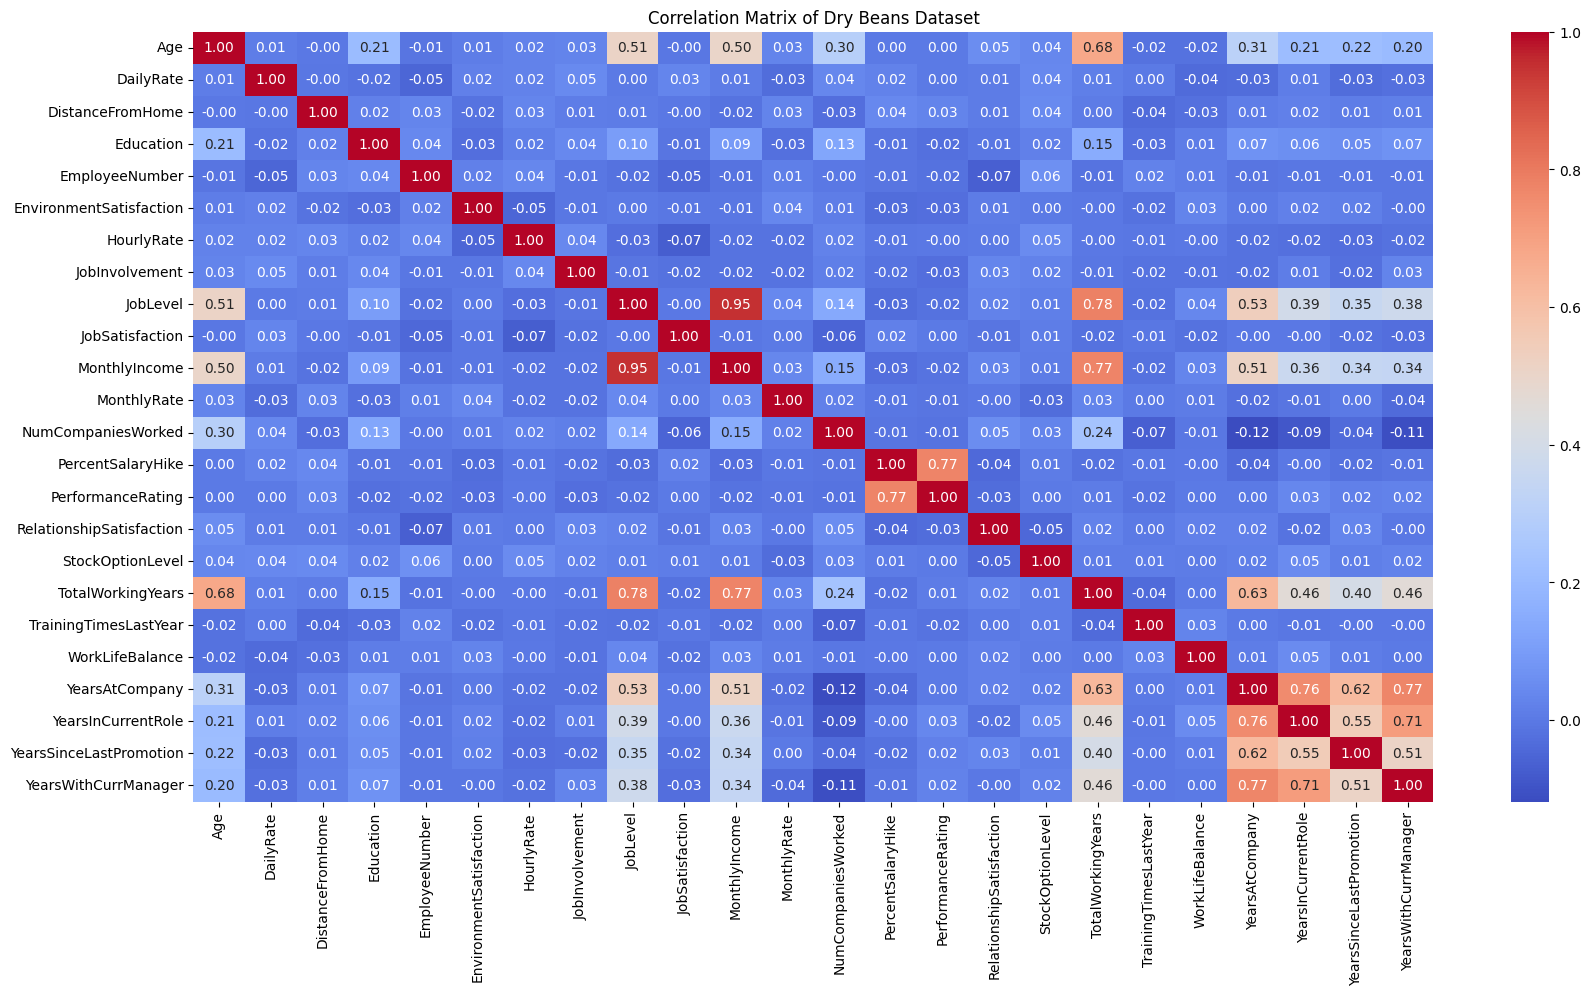

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only the numerical columns (excluding the last categorical feature)
numerical_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Dry Beans Dataset')
plt.show()

## Categorical Features

The following roles seemingly have no order/rank to them: Department, EducationField, and JobRole. Since these have no rank to them label encoding will result in a number that doesn't necessarily represent anything meaningful about the feature or data in general. For this reason we will exclude these from the PCA process. The rest are inherently binary which makes them more suitable for PCA.

In [6]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


# Preprocessing

label encode the binary categorical features and drop the others listed above

In [7]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Attrition', 'BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime']
df.drop(columns = ['Department', 'EducationField', 'JobRole'], inplace = True)

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,8,1,2,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,3,4,5,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,2,1,7,1,1,40,...,3,4,1,6,3,3,2,2,2,2


normalize the data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)

In [9]:
import pingouin as pg

# Assuming df is your DataFrame containing the variables of interest
corr_result = pg.pairwise_corr(data=df, method='pearson')

print(corr_result)


                           X                        Y   method alternative  \
0                        Age                Attrition  pearson   two-sided   
1                        Age           BusinessTravel  pearson   two-sided   
2                        Age                DailyRate  pearson   two-sided   
3                        Age         DistanceFromHome  pearson   two-sided   
4                        Age                Education  pearson   two-sided   
..                       ...                      ...      ...         ...   
401           YearsAtCompany  YearsSinceLastPromotion  pearson   two-sided   
402           YearsAtCompany     YearsWithCurrManager  pearson   two-sided   
403       YearsInCurrentRole  YearsSinceLastPromotion  pearson   two-sided   
404       YearsInCurrentRole     YearsWithCurrManager  pearson   two-sided   
405  YearsSinceLastPromotion     YearsWithCurrManager  pearson   two-sided   

        n         r           CI95%          p-unc        BF10 

# PCA Assumptions

## KMO

KMO test results in a value of 0.7576 which indicates that there are sufficient correlations in the data to warrant PCA.

In [10]:
import pandas as pd
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(normalized_df)
print(f"KMO Test Value: {kmo_model}")

KMO Test Value: 0.7576063992715638


## Sphericity

Bartlett's test of sphercity results in a very large number meaning that the computed correlation matrix is significantly different than the identity, which means there are substantial correlations in the data justifying the use of PCA.

In [11]:
from scipy.stats import bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(normalized_df)
print(f"Bartlett’s Test Chi-Squared Value: {chi_square_value}, P-Value: {p_value}")


Bartlett’s Test Chi-Squared Value: 13262.35376972711, P-Value: 0.0


## VIF

VIF reveals that there are a couple values in the range 5-10 indicating some features are collinear with other features, again justifying the use of PCA.

In [12]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# convert normalized_df to pandas datframe
p_normalized_df = pd.DataFrame(normalized_df)

# Assuming that df is your DataFrame
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = p_normalized_df.columns

# Assuming that you've already standardized your data if necessary
vif_data["VIF"] = [variance_inflation_factor(p_normalized_df.values, i) for i in range(len(p_normalized_df.columns))]
print(vif_data)

p_normalized_df.drop(columns = [11, 14], inplace = True)

#normalized_df = p_normalized_df.values


    feature        VIF
0         0   2.063860
1         1   1.265849
2         2   1.016179
3         3   1.025597
4         4   1.025486
5         5   1.063286
6         6   1.022818
7         7   1.034381
8         8   1.021015
9         9   1.020636
10       10   1.036831
11       11  11.242147
12       12   1.038417
13       13   1.852671
14       14  10.837447
15       15   1.014771
16       16   1.277210
17       17   1.110659
18       18   2.522034
19       19   2.517621
20       20   1.030630
21       21   1.830907
22       22   4.782379
23       23   1.021525
24       24   1.019441
25       25   4.606407
26       26   2.734107
27       27   1.689581
28       28   2.794967


Pairs with small p-values indicate that the correlation observed is unlikely to have occurred by chance, suggesting a real relationship between the features.

In [13]:
from scipy.stats import pearsonr

features = df.columns.tolist()  # Ensure 'features' is a list for iteration
correlation_data = []  # Initialize an empty list to store correlation data

# Iterate over each pair of features to calculate Pearson correlation
for i, feature1 in enumerate(features):
    for feature2 in features[i+1:]:  # Avoid repeating pairs and self-correlation
        corr_coefficient, p_value = pearsonr(df[feature1], df[feature2])
        # Append the result as a dictionary to the list
        correlation_data.append({
            'Feature 1': feature1,
            'Feature 2': feature2,
            'Correlation Coefficient': corr_coefficient,
            'P-Value': p_value
        })

# Convert the list of dictionaries to a DataFrame
correlation_results = pd.DataFrame(correlation_data)

# Now you can display or use your correlation_results DataFrame
print(correlation_results)


                   Feature 1                Feature 2  \
0                        Age                Attrition   
1                        Age           BusinessTravel   
2                        Age                DailyRate   
3                        Age         DistanceFromHome   
4                        Age                Education   
..                       ...                      ...   
401           YearsAtCompany  YearsSinceLastPromotion   
402           YearsAtCompany     YearsWithCurrManager   
403       YearsInCurrentRole  YearsSinceLastPromotion   
404       YearsInCurrentRole     YearsWithCurrManager   
405  YearsSinceLastPromotion     YearsWithCurrManager   

     Correlation Coefficient        P-Value  
0                  -0.159205   8.356308e-10  
1                   0.024751   3.429654e-01  
2                   0.010661   6.829722e-01  
3                  -0.001686   9.484990e-01  
4                   0.208034   7.776860e-16  
..                       ...           

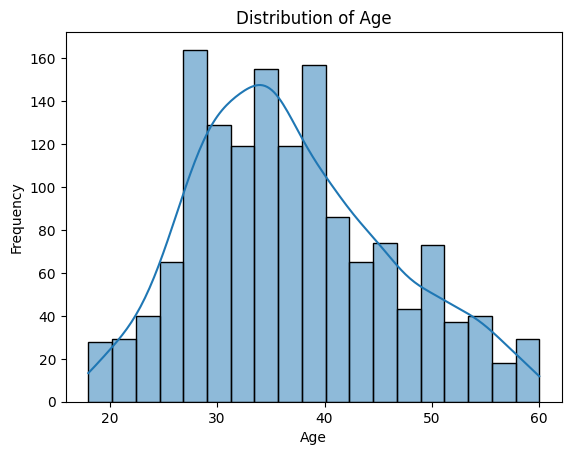

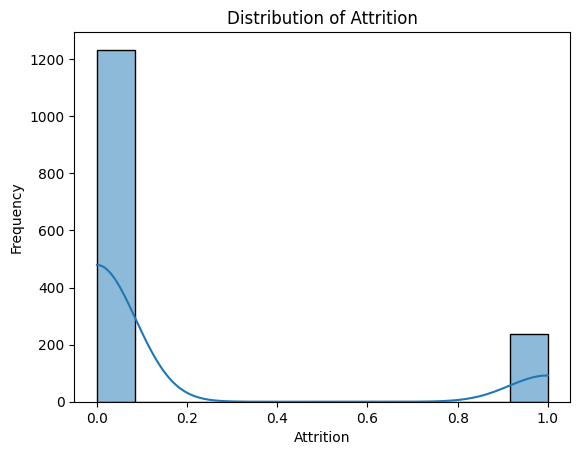

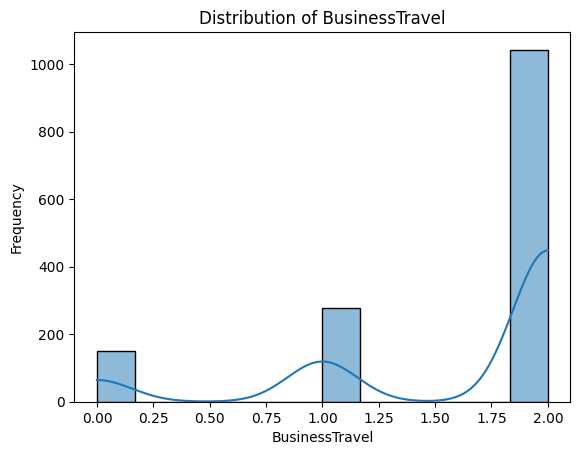

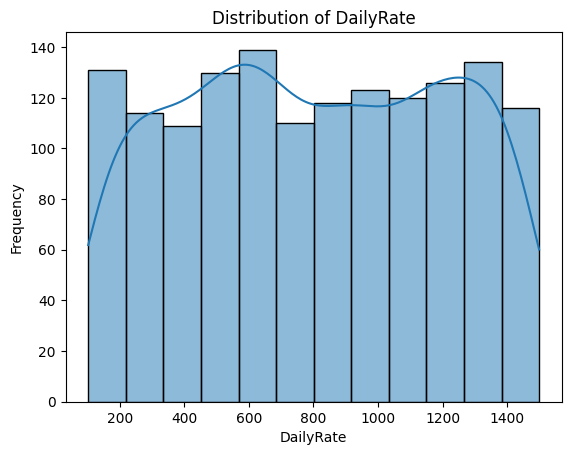

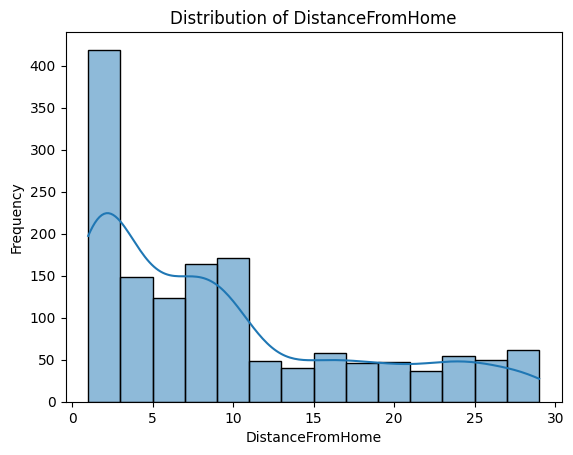

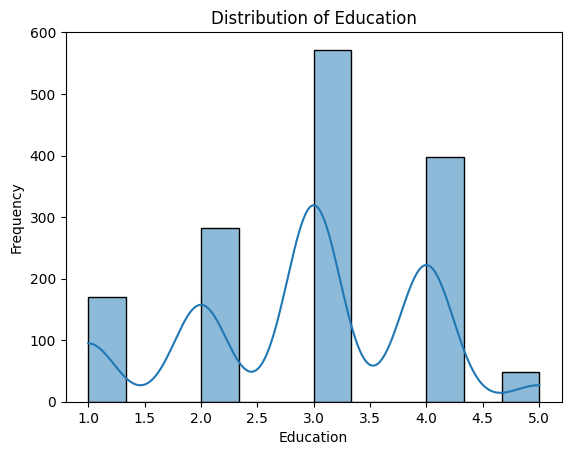

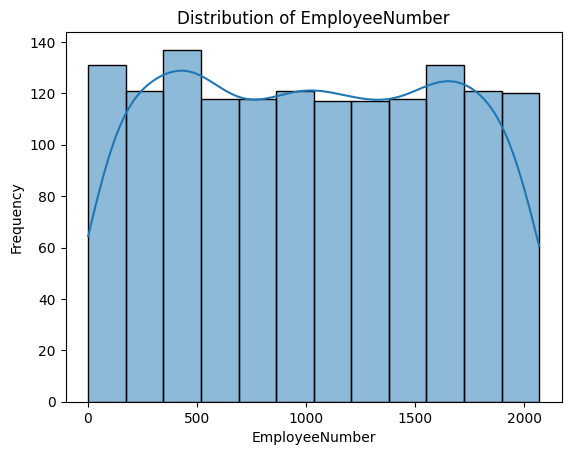

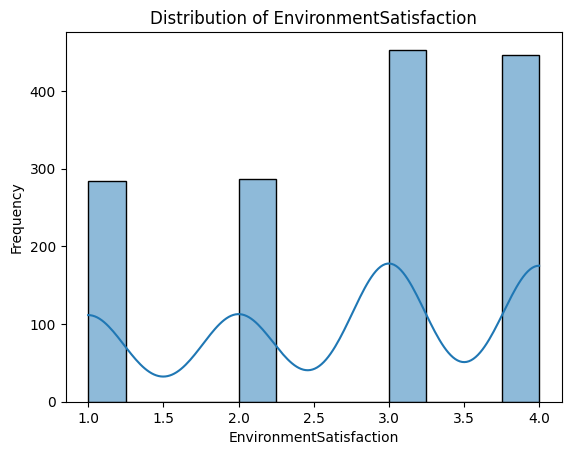

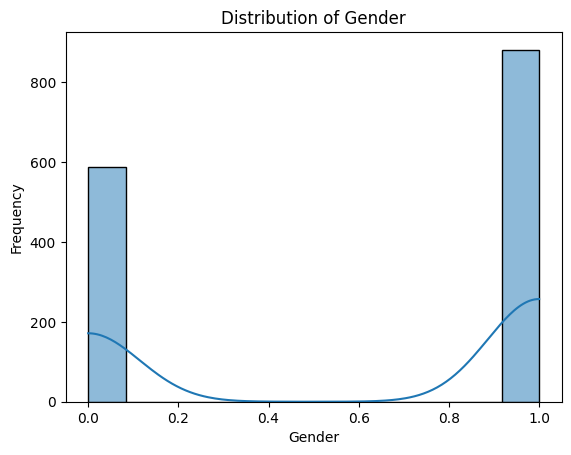

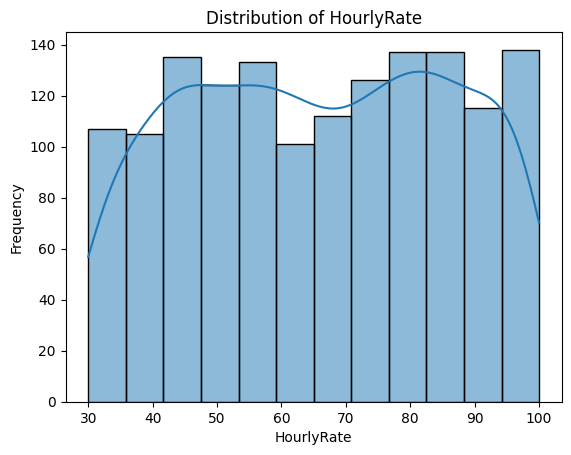

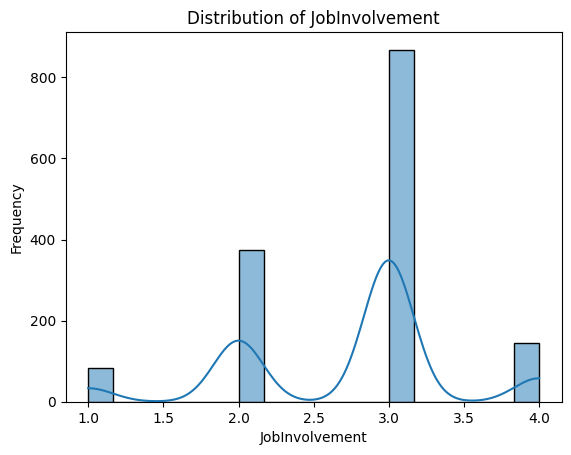

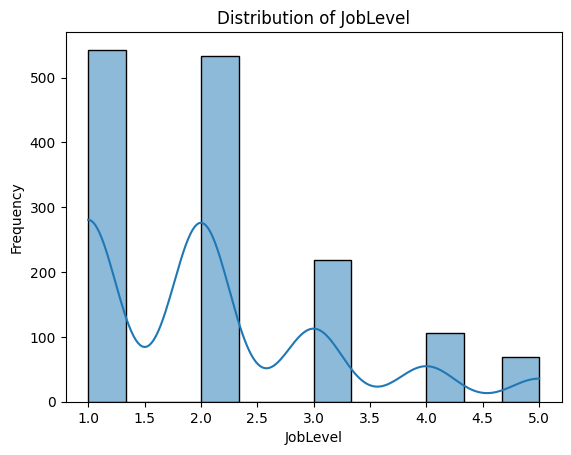

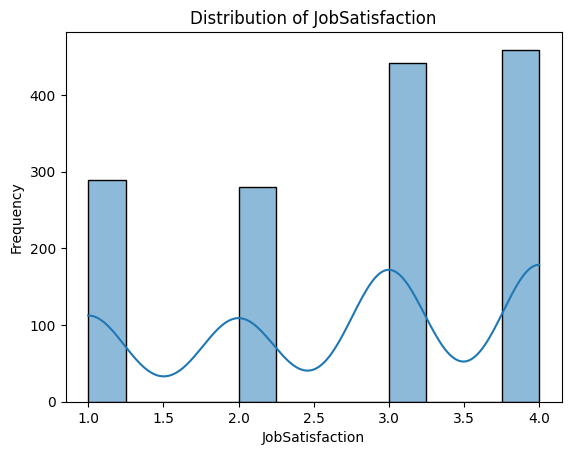

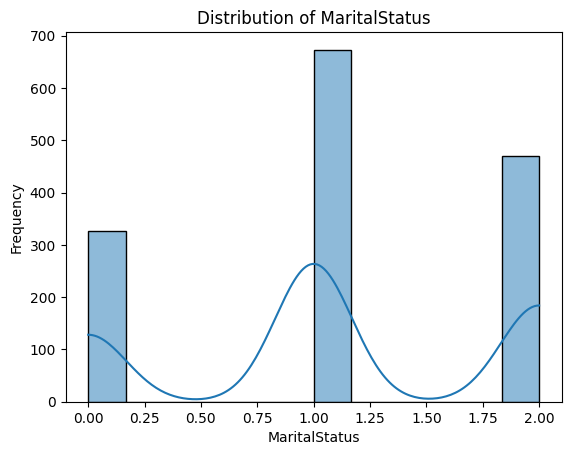

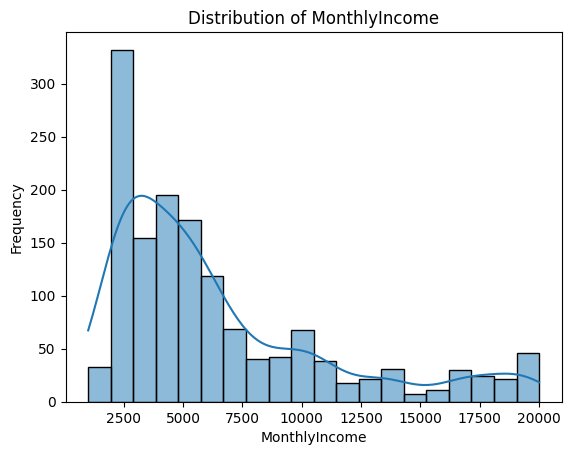

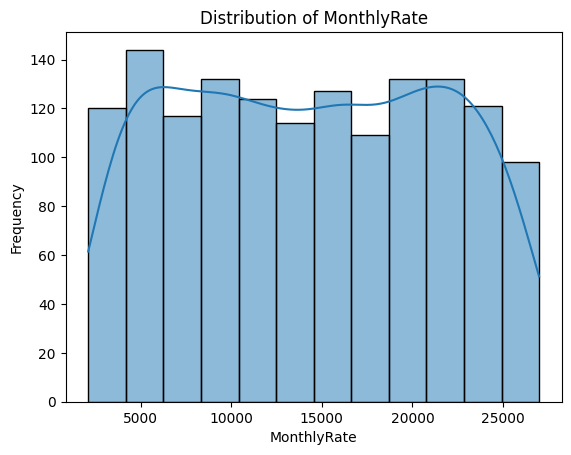

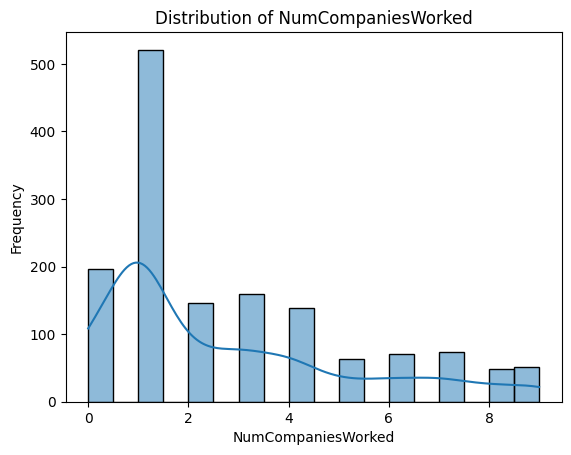

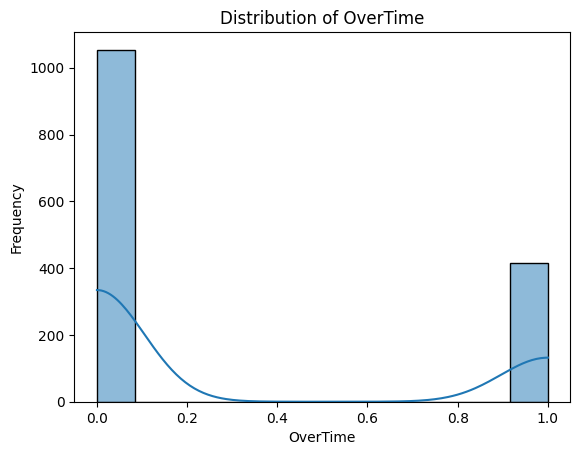

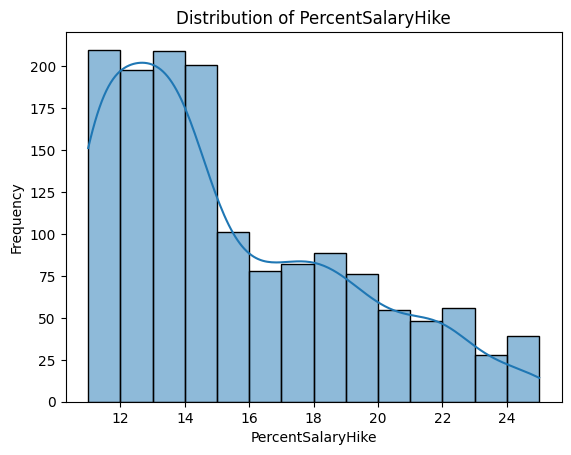

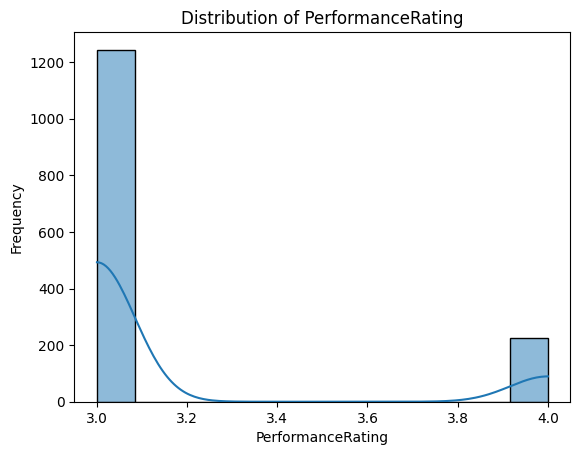

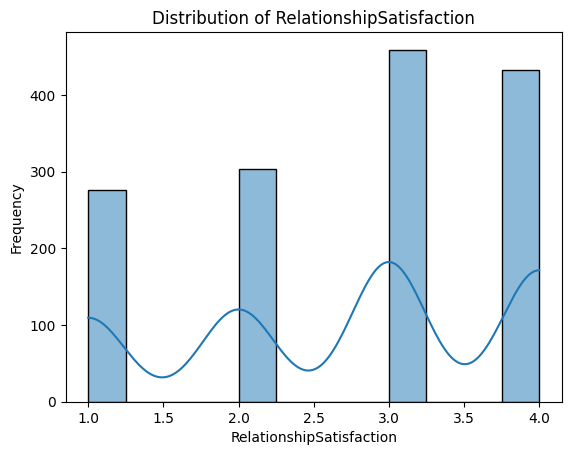

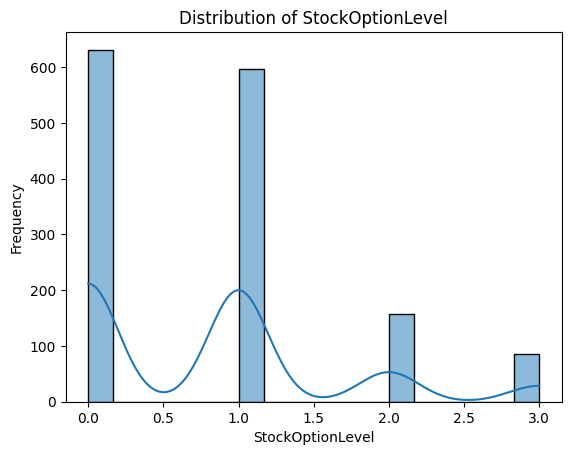

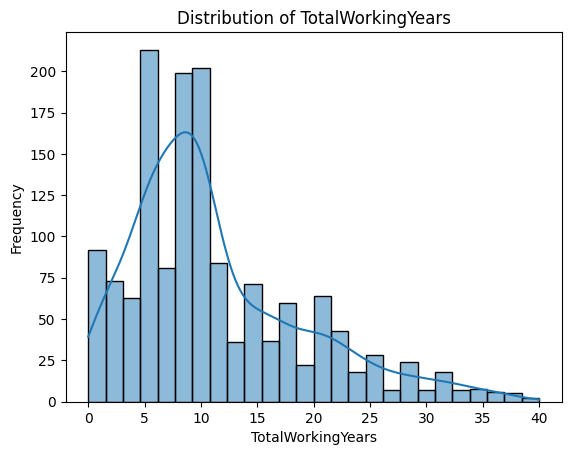

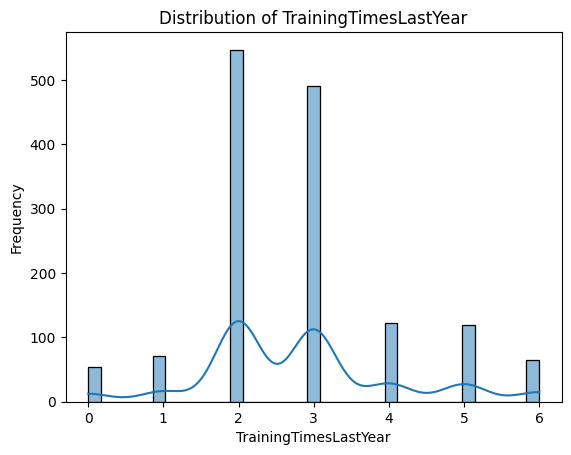

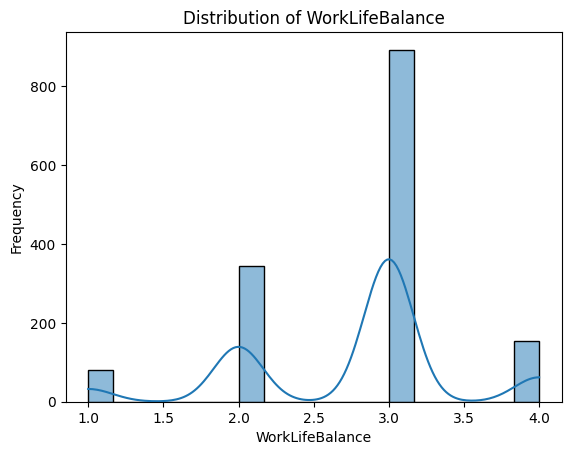

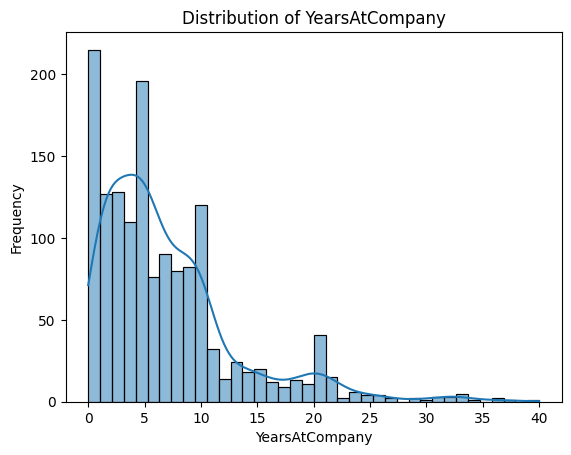

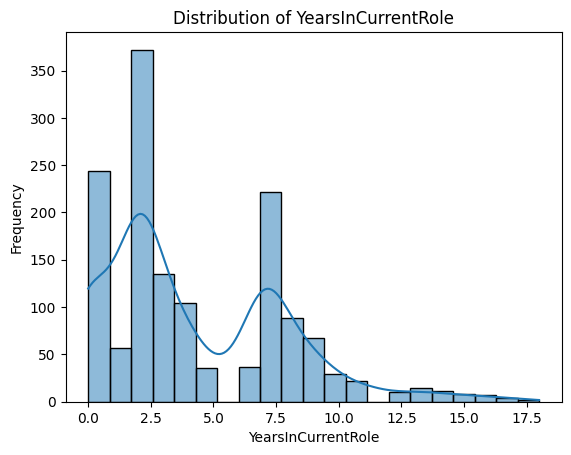

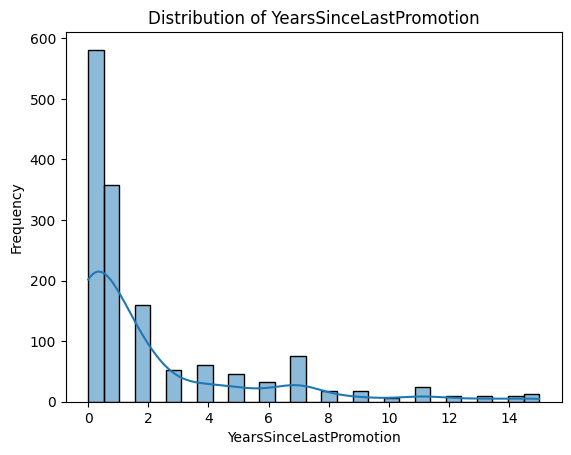

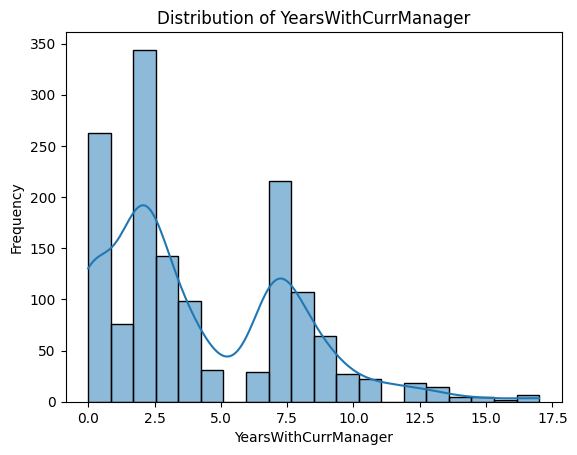

In [14]:
columns = df.columns  # This includes all columns. You can select specific columns if needed.

for feature in columns:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
# Perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
for feature in columns:
    stat, p = shapiro(df[feature])
    print(f'{feature}: Statistics={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')


Age: Statistics=0.9774477481842041, p=2.0344830149992416e-14
Sample does not look Gaussian (reject H0)

Attrition: Statistics=0.4420800805091858, p=0.0
Sample does not look Gaussian (reject H0)

BusinessTravel: Statistics=0.612533450126648, p=0.0
Sample does not look Gaussian (reject H0)

DailyRate: Statistics=0.9543985724449158, p=5.330638230111193e-21
Sample does not look Gaussian (reject H0)

DistanceFromHome: Statistics=0.86159348487854, p=4.085998618826597e-34
Sample does not look Gaussian (reject H0)

Education: Statistics=0.8954083919525146, p=1.7267483511319274e-30
Sample does not look Gaussian (reject H0)

EmployeeNumber: Statistics=0.9524861574172974, p=2.0009642401015872e-21
Sample does not look Gaussian (reject H0)

EnvironmentSatisfaction: Statistics=0.8489609360694885, p=2.735179342976351e-35
Sample does not look Gaussian (reject H0)

Gender: Statistics=0.6218936443328857, p=0.0
Sample does not look Gaussian (reject H0)

HourlyRate: Statistics=0.9550323486328125, p=7.4251

In [16]:
# Standardize the data
features = columns
x = df.loc[:, features].values
y = df.loc[:, ['Age']].values
x = StandardScaler().fit_transform(x)

In [17]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(x.T)
print("Covariance matrix:\n", cov_matrix)


Covariance matrix:
 [[ 1.00068074e+00 -1.59313383e-01  2.47682834e-02  1.06681999e-02
  -1.68726795e-03  2.08175347e-01 -1.01523735e-02  1.01533349e-02
  -3.63352680e-02  2.43030753e-02  2.98402581e-02  5.09951134e-01
  -4.89520722e-03 -9.50935996e-02  4.98193474e-01  2.80702626e-02
   2.99838730e-01  2.80814601e-02  3.63605842e-03  1.90519156e-03
   5.35711626e-02  3.75352466e-02  6.80843695e-01 -1.96341755e-02
  -2.15046570e-02  3.11520689e-01  2.13045985e-01  2.16660756e-01
   2.02226171e-01]
 [-1.59313383e-01  1.00068074e+00  7.38271686e-05 -5.66905569e-02
   7.79766283e-02 -3.13941762e-02 -1.05844431e-02 -1.03439345e-01
   2.94733030e-02 -6.85020958e-03 -1.30104463e-01 -1.69219866e-01
  -1.03551569e-01  1.62180562e-01 -1.59948391e-01  1.51805394e-02
   4.35233468e-02  2.46285535e-01 -1.34873771e-02  2.89071819e-03
  -4.59035058e-02 -1.37238278e-01 -1.71179695e-01 -5.95182872e-02
  -6.39825728e-02 -1.34483699e-01 -1.60654293e-01 -3.30412522e-02
  -1.56305646e-01]
 [ 2.47682834e-02 

In [18]:
# Step 4: Calculate Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigen_values)
print("Eigenvectors:\n", eigen_vectors)


Eigenvalues:
 [4.7203368  1.85244159 1.77390334 1.73020143 0.04826852 0.14107256
 0.20297333 0.22517958 0.27965518 0.32609219 0.49052648 0.52151498
 0.6099279  1.30583461 1.19280681 0.77701249 1.14542725 1.09081211
 1.07488398 0.85008072 1.0456812  0.88161481 1.0257104  1.00336113
 0.90478855 0.91983825 0.97538233 0.94945678 0.954956  ]
Eigenvectors:
 [[-2.76656029e-01  2.96002616e-01 -1.52506346e-01 -1.77904463e-01
   1.41905185e-02  2.28819978e-01 -2.69809312e-01  7.08622533e-02
   5.32095095e-02  5.98857613e-02  3.60552855e-01  5.97735965e-01
  -3.55648137e-01  1.79466838e-02  2.19278527e-02  5.64432997e-02
   2.86475681e-02 -4.15245023e-02  2.38648914e-02  6.22909934e-02
   3.23118235e-02  4.89656754e-02  1.04688068e-02  5.54342931e-02
   4.60618967e-02  5.08077786e-02 -1.25319629e-02  8.02159408e-02
   3.82750684e-02]
 [ 1.13282454e-01 -5.26315393e-02  1.51529805e-01 -2.35545298e-01
  -1.13657935e-03 -2.76046525e-02 -3.39684980e-02  2.54899230e-02
   1.55375010e-02 -2.51349455e-02

In [19]:
# Step 5: Explained Variance
tot = sum(eigen_values)
var_exp = [(i / tot) * 100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Explained Variance:\n", var_exp)
print("Cumulative Explained Variance:\n", cum_var_exp)


Explained Variance:
 [16.265950645539608, 6.383384233007382, 6.112746923765973, 5.962153165525853, 4.499814796846334, 4.110328869522093, 3.947062240448599, 3.7588622949800907, 3.703975044415443, 3.60334433259117, 3.534526328464698, 3.4575123031939423, 3.3610993247117493, 3.290711610134657, 3.271761701321064, 3.169698326070884, 3.1178381039374994, 3.0379830068489775, 2.9293187447902174, 2.677530723452145, 2.101768908934564, 1.7971041645353099, 1.6903199541057874, 1.123690891198309, 0.9636722041070503, 0.7759530976947072, 0.6994319147994236, 0.48612619733812673, 0.166329947718363]
Cumulative Explained Variance:
 [ 16.26595065  22.64933488  28.7620818   34.72423497  39.22404976
  43.33437863  47.28144087  51.04030317  54.74427821  58.34762255
  61.88214888  65.33966118  68.7007605   71.99147211  75.26323381
  78.43293214  81.55077024  84.58875325  87.518072    90.19560272
  92.29737163  94.09447579  95.78479575  96.90848664  97.87215884
  98.64811194  99.34754385  99.83367005 100.        

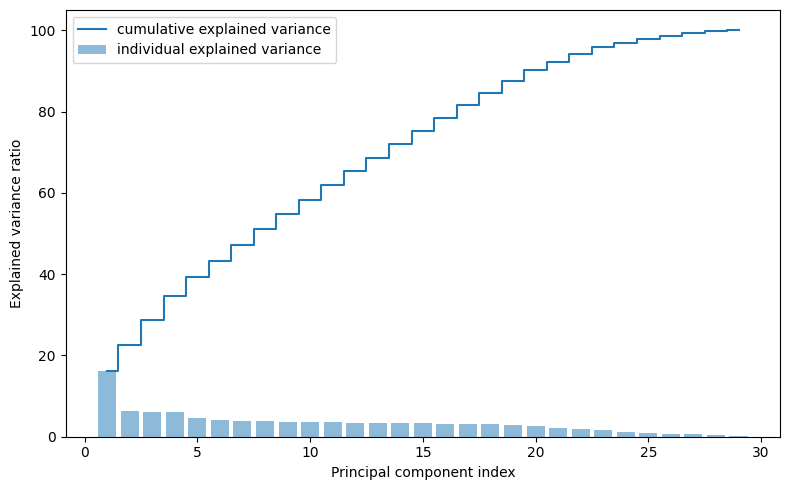

In [20]:
# Plot explained variances
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


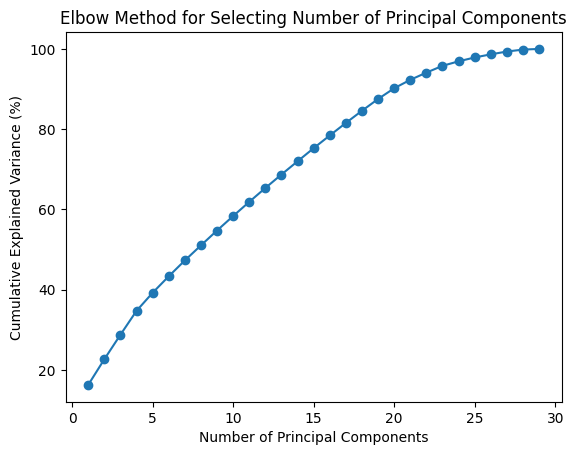

In [21]:
# Step 6: Select Principal Components
# Use the elbow method to decide how many principal components to retain
plt.plot(range(1, 30), cum_var_exp, marker='o')
plt.title('Elbow Method for Selecting Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.show()


In [22]:
matrix_w = eigen_vectors[:, :20]


In [23]:
matrix_w_df = pd.DataFrame(
    data=matrix_w, 
    columns=[str(i) for i in range(1, 21)],  # Generates column names from '1' to '23'
    index=columns
)
print("Matrix W:\n", matrix_w_df)

Matrix W:
                                  1         2         3         4         5  \
Age                      -0.276656  0.296003 -0.152506 -0.177904  0.014191   
Attrition                 0.113282 -0.052632  0.151530 -0.235545 -0.001137   
BusinessTravel           -0.003711  0.082439  0.027479 -0.047519 -0.010401   
DailyRate                 0.000979  0.064796 -0.109748  0.061898 -0.002974   
DistanceFromHome         -0.001875 -0.047014 -0.049576  0.003684  0.016494   
Education                -0.077085  0.146552 -0.050491 -0.073763  0.001947   
EmployeeNumber            0.007621  0.021113 -0.017064  0.076623 -0.004284   
EnvironmentSatisfaction  -0.005620  0.033268  0.026222  0.046658  0.005257   
Gender                    0.027350 -0.007418 -0.014267  0.072938 -0.004774   
HourlyRate                0.009308  0.063016 -0.056524  0.039944 -0.009083   
JobInvolvement           -0.003594  0.069979 -0.042811  0.095159  0.001226   
JobLevel                 -0.379928  0.185093 -0.04695

In [25]:
from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components = 20)
x_pca = pca.fit_transform(x)  # Fit and transform the data

# Number of components
print(f"Number of components: {pca.n_components_}")


Number of components: 20


In [26]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]  # Number of variables
    rs = np.sum(np.triu(df_corr, 1))  # Sum of all correlations
    mean_r = rs / (N * (N - 1) / 2)  # Average correlation
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

# Assuming 'df' is your DataFrame with the relevant features
print("Cronbach's alpha:", cronbach_alpha(df[features]))


Cronbach's alpha: 0.4948622102367443


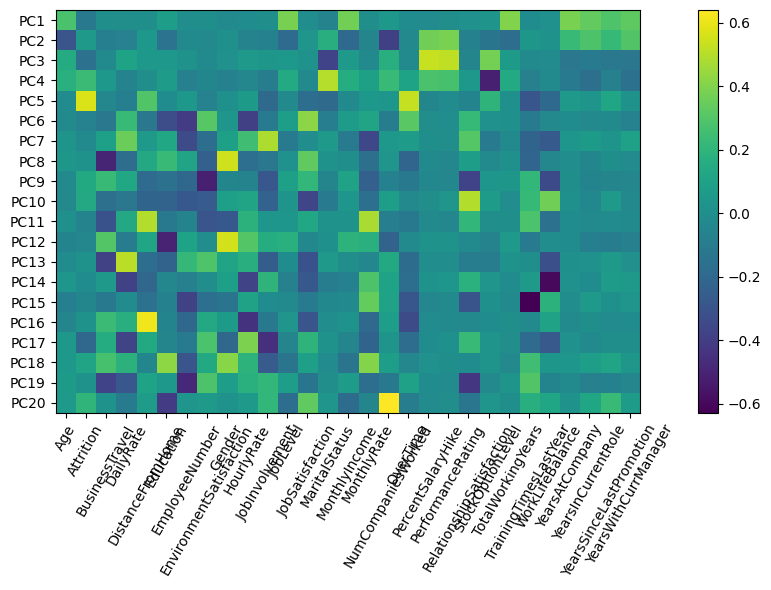

In [27]:
plt.figure(figsize=(12, 6))
plt.imshow(pca.components_, interpolation='none', cmap='viridis')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60)
plt.yticks(range(len(pca.components_)), ['PC{}'.format(i+1) for i in range(len(pca.components_))])
plt.tight_layout()
plt.show()


In [28]:
# Assuming we're working with the first principal component
first_pc = x_pca[:, 0]

# Scale to 0-100
min_max_scaled_first_pc = (first_pc - first_pc.min()) / (first_pc.max() - first_pc.min()) * 100



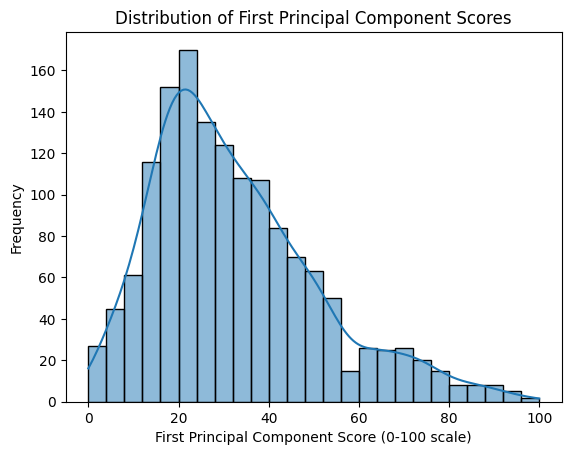

In [29]:
sns.histplot(min_max_scaled_first_pc, kde=True)
plt.title('Distribution of First Principal Component Scores')
plt.xlabel('First Principal Component Score (0-100 scale)')
plt.ylabel('Frequency')
plt.show()


Job Level and Monthly Income seem particularly important and could be directly related to bonus amounts.
NumCompaniesWorked and PerformanceRating may reflect aspects of experience and merit that could influence bonus decisions.
Other factors like Age, BusinessTravel, Education, and DistanceFromHome might be indirectly related to performance or could influence bonus decisions if they correlate with other important variables.

For instance, 'JobLevel' and 'MonthlyIncome' have high absolute values in the first principal component, indicating that they might be significant predictors of performance. 'NumCompaniesWorked' and 'PerformanceRating' have high values in the second component, which might capture another aspect of performance.

This plot helps to identify the number of principal components that offer a balance between simplicity and explanatory power. The 'elbow' is not very pronounced, suggesting that many components contribute to the variance, and thus, many performance indicators are important.

The distribution of the first principal component scores looks approximately normal, indicating that this component captures a factor that varies across a spectrum with most employees scoring around the middle of the scale.

 The histogram shows a roughly normal distribution centered around the mid-30s. Age might be a factor in performance, but the normal distribution suggests it might not be the strongest predictor of bonus awards unless there is a trend that is not visible from the histogram alone.

We determined to do roughly 80% of the variance which is 20 features. 